<Figure size 1200x800 with 0 Axes>

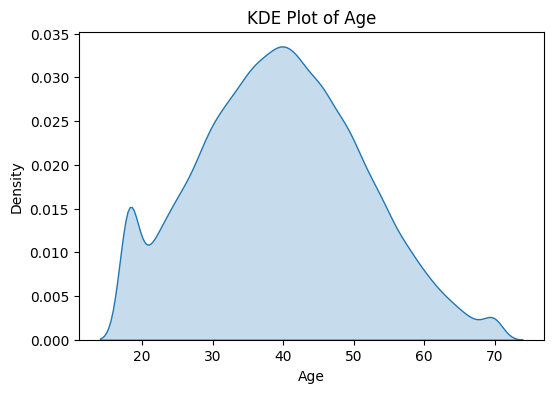

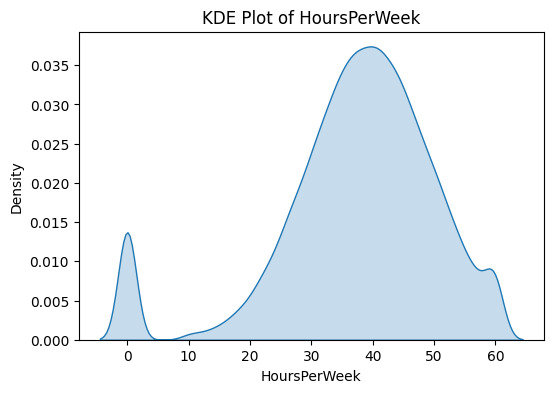

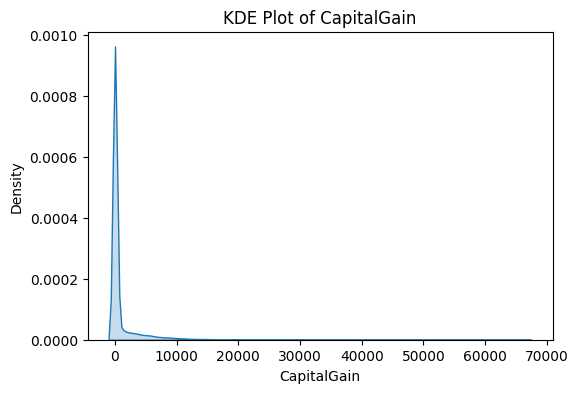

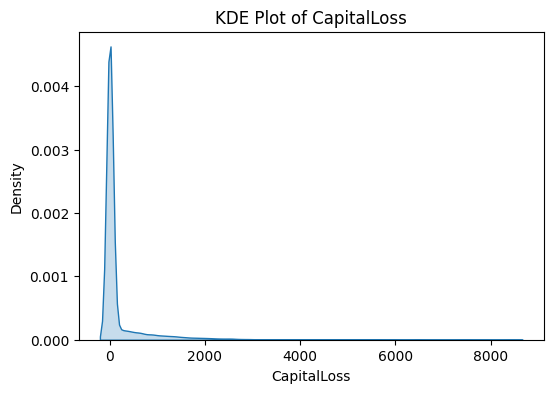

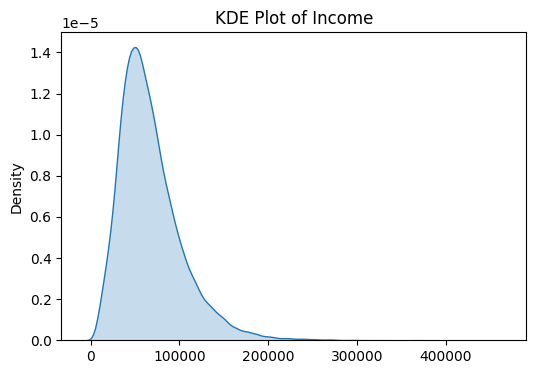

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

num_samples = 50_000
np.random.seed(42)

ages = np.clip(np.random.normal(40, 12, num_samples).astype(int), 18, 70)

education_levels = ["No HS", "HS Grad", "Some College", "Associate", "Bachelor's", "Master's", "PhD"]
education_multipliers = [0.8, 1.0, 1.2, 1.3, 1.6, 1.8, 2.2]
education = np.random.choice(education_levels, num_samples, p=[0.1, 0.2, 0.3, 0.15, 0.15, 0.08, 0.02])
education_factor = np.array([education_multipliers[education_levels.index(e)] for e in education])

work_classes = ["Private", "Self-Employed", "Government", "Unemployed"]
base_salaries = [50_000, 40_000, 60_000, 15_000]
work_class = np.random.choice(work_classes, num_samples, p=[0.7, 0.1, 0.15, 0.05])
work_class_factor = np.array([base_salaries[work_classes.index(w)] for w in work_class])

occupations = ["Tech", "Sales", "Clerical", "Blue Collar", "Management", "Healthcare", "Education"]
occupation = np.random.choice(occupations, num_samples)

marital_statuses = ["Single", "Married", "Divorced", "Widowed"]
marital_status = np.random.choice(marital_statuses, num_samples, p=[0.4, 0.45, 0.1, 0.05])

hours_per_week = np.clip(np.random.normal(40, 10, num_samples).astype(int), 10, 60)
hours_per_week = np.where(work_class == "Unemployed", 0, hours_per_week)

genders = ["Male", "Female", "Other"]
gender = np.random.choice(genders, num_samples, p=[0.48, 0.48, 0.04])

races = ["White", "Black", "Asian", "Hispanic", "Other"]
race = np.random.choice(races, num_samples, p=[0.6, 0.15, 0.1, 0.1, 0.05])

countries = ["USA", "Canada", "Mexico", "India", "China", "UK", "Germany", "Other"]
native_country = np.random.choice(countries, num_samples, p=[0.7, 0.05, 0.05, 0.05, 0.05, 0.03, 0.03, 0.04])

capital_gain = np.random.exponential(scale=5000, size=num_samples).astype(int)
capital_loss = np.random.exponential(scale=1000, size=num_samples).astype(int)

capital_gain[np.random.rand(num_samples) < 0.8] = 0
capital_loss[np.random.rand(num_samples) < 0.8] = 0

income_values = (work_class_factor * education_factor * np.random.lognormal(mean=0, sigma=0.4, size=num_samples)) + capital_gain - capital_loss

income_class = np.digitize(income_values, bins=[50_000])

df = pd.DataFrame({
    "Age": ages,
    "Gender": gender,
    "Race": race,
    "Education": education,
    "WorkClass": work_class,
    "Occupation": occupation,
    "MaritalStatus": marital_status,
    "HoursPerWeek": hours_per_week,
    "CapitalGain": capital_gain,
    "CapitalLoss": capital_loss,
    "NativeCountry": native_country,
    #"Income": np.round(income_values, 2),
    "IncomeClass": income_class
})
df.to_csv("synthetic_data.csv", index=False)

numerical_cols = ["Age", "HoursPerWeek", "CapitalGain", "CapitalLoss"]
plt.figure(figsize=(12, 8))

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot of {col}")
    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    plt.show()

plt.figure(figsize=(6, 4))
sns.kdeplot(income_values, fill=True)
plt.title(f"KDE Plot of Income")
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.show()
